In [57]:
import os
import re
import csv
import urllib
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from urllib.request import urlopen
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [58]:
if os.path.exists("stats.csv"):
    os.remove("stats.csv")
if os.path.exists("abilities.csv"):
    os.remove("abilities.csv")
api.dataset_download_file('dannielr/marvel-superheroes', 'charcters_stats.csv')
api.dataset_download_file('dannielr/marvel-superheroes', 'superheroes_power_matrix.csv')
os.rename("charcters_stats.csv", "stats.csv")
os.rename("superheroes_power_matrix.csv", "abilities.csv")

In [59]:
stats = pd.read_csv("stats.csv")
abilities = pd.read_csv("abilities.csv")
df = stats.merge(abilities, on=['Name'])
sdf = stats[stats.Name.isin(df.Name)]
adf = abilities[abilities.Name.isin(df.Name)]

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
48,Aurora,good,50,15,83,56,69,56,329


Special Abilities : 
['Accelerated Healing', 'Durability', 'Flight', 'Energy Blasts', 'Super Speed', 'Reflexes', 'Molecular Manipulation', 'Light Control', 'Illumination', 'Molecular Combustion']


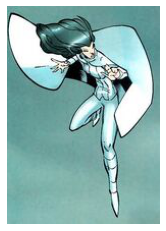

Find out more about this Marvel character here :  https://marvel.fandom.com/wiki/Aurora


In [60]:
rand1 = sdf.sample()
display(rand1)
for i in rand1.Name :
    abdf = adf.loc[adf['Name'] == i]
    abidf = abdf.loc[:,[(abdf[col] == True).all() for col in abdf.columns]]
    print("Special Abilities : ")
    sa = list(abidf.columns)
    print(sa)
    temp = i.replace(" ", "_")
    marvellink = 'https://marvel.fandom.com/wiki/'+temp
    html = urlopen(marvellink)
    bs = BeautifulSoup(html, 'html.parser')
    il = bs.find('img', {'src':re.compile('.jpg')})['src']
    urllib.request.urlretrieve(il,"img.jpg")
    plt.imshow(mpimg.imread('img.jpg'))
    plt.axis('off')
    plt.show()
    os.remove("img.jpg")
    print("Find out more about this Marvel character here : ",marvellink)